In [1]:
from SliceNet import SliceNet
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

W0414 19:49:10.524001 139800368862976 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


1.13.1


Using TensorFlow backend.


importing hub


In [2]:
net = SliceNet()

In [3]:
dataPath = Path('/home/bmmidei/SliceCast/data/dev/hdf5')
files = [str(x) for x in dataPath.glob('**/*') if x.suffix=='.hdf5']

val_prop = 0.2
mask = random.sample(range(0,len(files)), math.floor(val_prop*len(files)))

# randomly assign some files to validation and the rest to train
train_files = [x for (i,x) in enumerate(files) if i not in mask]
val_files = [x for (i,x) in enumerate(files) if i in mask]

In [ ]:
history = net.train(train_files=train_files,
                    val_files=val_files,
                    batch_size=8, 
                    epochs=10,
                    steps_per_epoch=500,
                    maxlen=None,
                    save=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoderIn (InputLayer)       (None, None)              0         
_________________________________________________________________
encoderOut (Lambda)          (None, None, 512)         0         
_________________________________________________________________
lstm_1 (Bidirectional)       (None, None, 512)         1574912   
_________________________________________________________________
lstm_2 (Bidirectional)       (None, None, 512)         1574912   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 256)         131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 256)         0         
__________

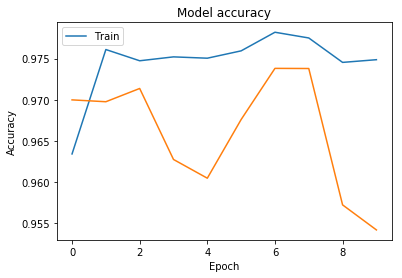

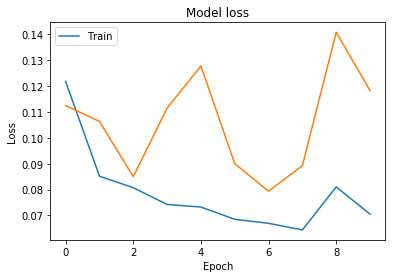

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [40]:
test_file = '/home/bmmidei/SliceCast/data/podcasts/hdf5/batch0_0.hdf5'
weights_path = '/home/bmmidei/SliceCast/models/model.h5'

preds, labels = net.predict(test_file=test_file,
                    num_samples=4,
                    weights_path=weights_path)

Starting Testing
Loaded weights from disk


Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7fd7d84cccc0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.


In [41]:
preds = np.squeeze(preds)
labels = np.squeeze(labels)
print(preds.shape)
print(labels.shape)
#p = preds[:,:,1]
preds[:,:,1] = np.add(preds[:,:,1], 0.3)
p = np.argmax(preds, axis=2)
l = np.argmax(labels, axis=2)



(4, 1238, 3)
(4, 1238, 3)


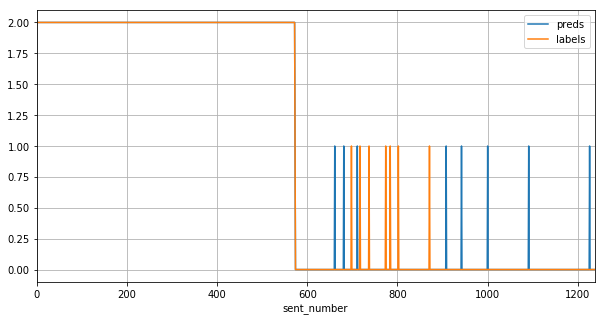

In [42]:
df = pd.DataFrame()
df['preds'] = p[1]
df['labels'] = l[1]
df['sent_number'] = df.index

df.plot(x='sent_number', y=['preds', 'labels'], figsize=(10,5), grid=True)

